# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
#Loading the dataset
#this problem containts two fileso ne for training data another is for testing the data lets import test data also
data = pd.read_excel('/home/santosh/code/Data-Science-ML-Capstone-Projects/Doctor_fee_consultation/Final Participant Data Folder/Final_Train.xlsx')
test_data = pd.read_excel('/home/santosh/code/Data-Science-ML-Capstone-Projects/Doctor_fee_consultation/Final Participant Data Folder/Final_Test.xlsx')
#displaying first 5 lines in the data
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [4]:
#shape of the data
data.shape

(5961, 7)

In [5]:
test_data.shape

(1987, 6)

In [6]:
#information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


# Exploratory Data Analysis

In [7]:
#checking the null values
data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [8]:
#checking null values in test data
test_data.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [9]:
#There are no null values in te column no no need to replace anything and when we see the colum, 
#it is mixture of categorical and numerical data to we have to prepare it 
#here we have splited the numerical value from the value and then changing the datatype of the value
data["Experience"] = data['Experience'].str.split().str[0]
data["Experience"] = data["Experience"].astype('int')

In [10]:
#applying same change on test data
test_data["Experience"] = test_data['Experience'].str.split().str[0]
test_data["Experience"] = test_data["Experience"].astype('int')

In [11]:
#we have transformed the Experience column
data.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350


In [12]:
test_data.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN


In [13]:
#As there are some missing values lets replace them with unkonwn values 
#so we can easily extract the the details with ease
data.Place.fillna( 'Unknown,Unknown', inplace = True)

data["Locality"] = data["Place"].str.split(",").str[0]
data["City"] = data["Place"].str.split(",").str[1]

#we have create two nwe columns and we can drop the Place column

data.drop(['Place'], axis = 1, inplace = True)

In [14]:
#making same  changes in the test data
test_data.Place.fillna( 'Unknown,Unknown', inplace = True)

test_data["Locality"] = test_data["Place"].str.split(",").str[0]
test_data["City"] = test_data["Place"].str.split(",").str[1]
test_data.drop(['Place'], axis = 1, inplace = True)

In [15]:
data.head(2)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore


In [16]:
test_data.head(2)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Locality,City
0,MBBS,35,NaN,General Medicine,NaN,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,ENT Specialist,NaN,West Marredpally,Hyderabad


In [17]:
# Seperate Ratings into bins
data["Rating"].fillna("-99%",inplace=True)
#if we want to convert to int to remove % sign 
data["Rating"] = data["Rating"].str[:-1].astype("int")
#here i group the the rating into bins so that missing values will fall under 0 group we till use pd.cut method for this
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
data["Rating"] = pd.cut(data["Rating"],bins=bins,labels=labels,include_lowest=True)

In [18]:
#Applying same for the test data
test_data["Rating"].fillna("-99%",inplace=True)

test_data["Rating"] = test_data["Rating"].str[:-1].astype("int")

bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
test_data["Rating"] = pd.cut(test_data["Rating"],bins=bins,labels=labels,include_lowest=True)

In [19]:
data["Rating"].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [20]:
test_data["Rating"].value_counts().sort_index()

0     1090
1        0
2        0
3        0
4        0
5        0
6        9
7       14
8       27
9      108
10     739
Name: Rating, dtype: int64

In [21]:
data.head(2)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City
0,"BHMS, MD - Homeopathy",24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore


In [22]:
test_data.head(2)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Locality,City
0,MBBS,35,0,General Medicine,NaN,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,ENT Specialist,NaN,West Marredpally,Hyderabad


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Qualification       5961 non-null   object  
 1   Experience          5961 non-null   int64   
 2   Rating              5961 non-null   category
 3   Profile             5961 non-null   object  
 4   Miscellaneous_Info  3341 non-null   object  
 5   Fees                5961 non-null   int64   
 6   Locality            5961 non-null   object  
 7   City                5960 non-null   object  
dtypes: category(1), int64(2), object(5)
memory usage: 332.3+ KB


In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Qualification       1987 non-null   object  
 1   Experience          1987 non-null   int64   
 2   Rating              1987 non-null   category
 3   Profile             1987 non-null   object  
 4   Miscellaneous_Info  1153 non-null   object  
 5   Locality            1987 non-null   object  
 6   City                1987 non-null   object  
dtypes: category(1), int64(1), object(5)
memory usage: 95.6+ KB


In [25]:
#actually some of the data already present in the profile column so i splited the Qualificaations 
#data.Qualification = data.Qualification.str.split(',').str[0]
# Extract relevant qualification
data["Qualification"]=data["Qualification"].str.split(",")
Qualification ={}
for x in data["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [26]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])

In [27]:
for title in final_qua:
    data[title]=0
    
for x,y in zip(data["Qualification"].values,np.array([idx for idx in range(len(data))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            data[q][y] = 1
            
data.drop("Qualification",axis=1,inplace=True)

In [28]:
#applying same for the test data
# Extract relevant qualification
test_data["Qualification"]=test_data["Qualification"].str.split(",")
Qualifications ={}
for x in test_data["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualifications:
            Qualifications[each]+=1
        else:
            Qualifications[each]=1
            
mostly_qua = sorted(Qualifications.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
    
for title in final_qua:
    test_data[title]=0
    
for x,y in zip(test_data["Qualification"].values,np.array([idx for idx in range(len(test_data))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            test_data[q][y] = 1
            
test_data.drop("Qualification",axis=1,inplace=True)


In [29]:
data.head(2)

,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0


In [30]:
test_data.head(2)

,Experience,Rating,Profile,Miscellaneous_Info,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,35,0,General Medicine,NaN,Ghatkopar East,Mumbai,1,0,0,0,0,0,0,0,0,0
1,31,0,ENT Specialist,NaN,West Marredpally,Hyderabad,1,0,0,0,0,0,0,0,1,0


In [31]:
#lets drop Miscellaneous_info. becuz it contains more missing values 
data = data.drop(["Miscellaneous_Info"], axis = 1)
test_data = test_data.drop(["Miscellaneous_Info"], axis = 1)

In [32]:
data.head()

,Experience,Rating,Profile,Fees,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [33]:
#here i am replacing 0 values 
data["Rating"] = data["Rating"].astype("int64")
mean = data["Rating"].mean()
data["Rating"] = data["Rating"].mask(data["Rating"] == 0, mean)

In [34]:
#doing same as train cloumn
#here i am replacing 0 values 
test_data["Rating"] = test_data["Rating"].astype("int64")
mean = test_data["Rating"].mean()
test_data["Rating"] = test_data["Rating"].mask(test_data["Rating"] == 0, mean)

In [35]:
data.head(5)

,Experience,Rating,Profile,Fees,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10.000000,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10.000000,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,4.343902,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,4.343902,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10.000000,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [36]:
test_data.head(2)

,Experience,Rating,Profile,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,35,4.393558,General Medicine,Ghatkopar East,Mumbai,1,0,0,0,0,0,0,0,0,0
1,31,4.393558,ENT Specialist,West Marredpally,Hyderabad,1,0,0,0,0,0,0,0,1,0


In [37]:
#lets check the null values
data.isnull().sum()


Experience                              0
Rating                                  0
Profile                                 0
Fees                                    0
Locality                                0
City                                    1
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
dtype: int64

In [38]:
test_data.isnull().sum()

Experience                              0
Rating                                  0
Profile                                 0
Locality                                0
City                                    0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
dtype: int64

In [39]:
#replaced by most frequent value
data.City = data.City.fillna(' Bangalore')

In [40]:
data.City.value_counts()

 Bangalore             1259
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
 Sector 5                 1
Name: City, dtype: int64

In [41]:
data.City.unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Unknown',
       ' Sector 5'], dtype=object)

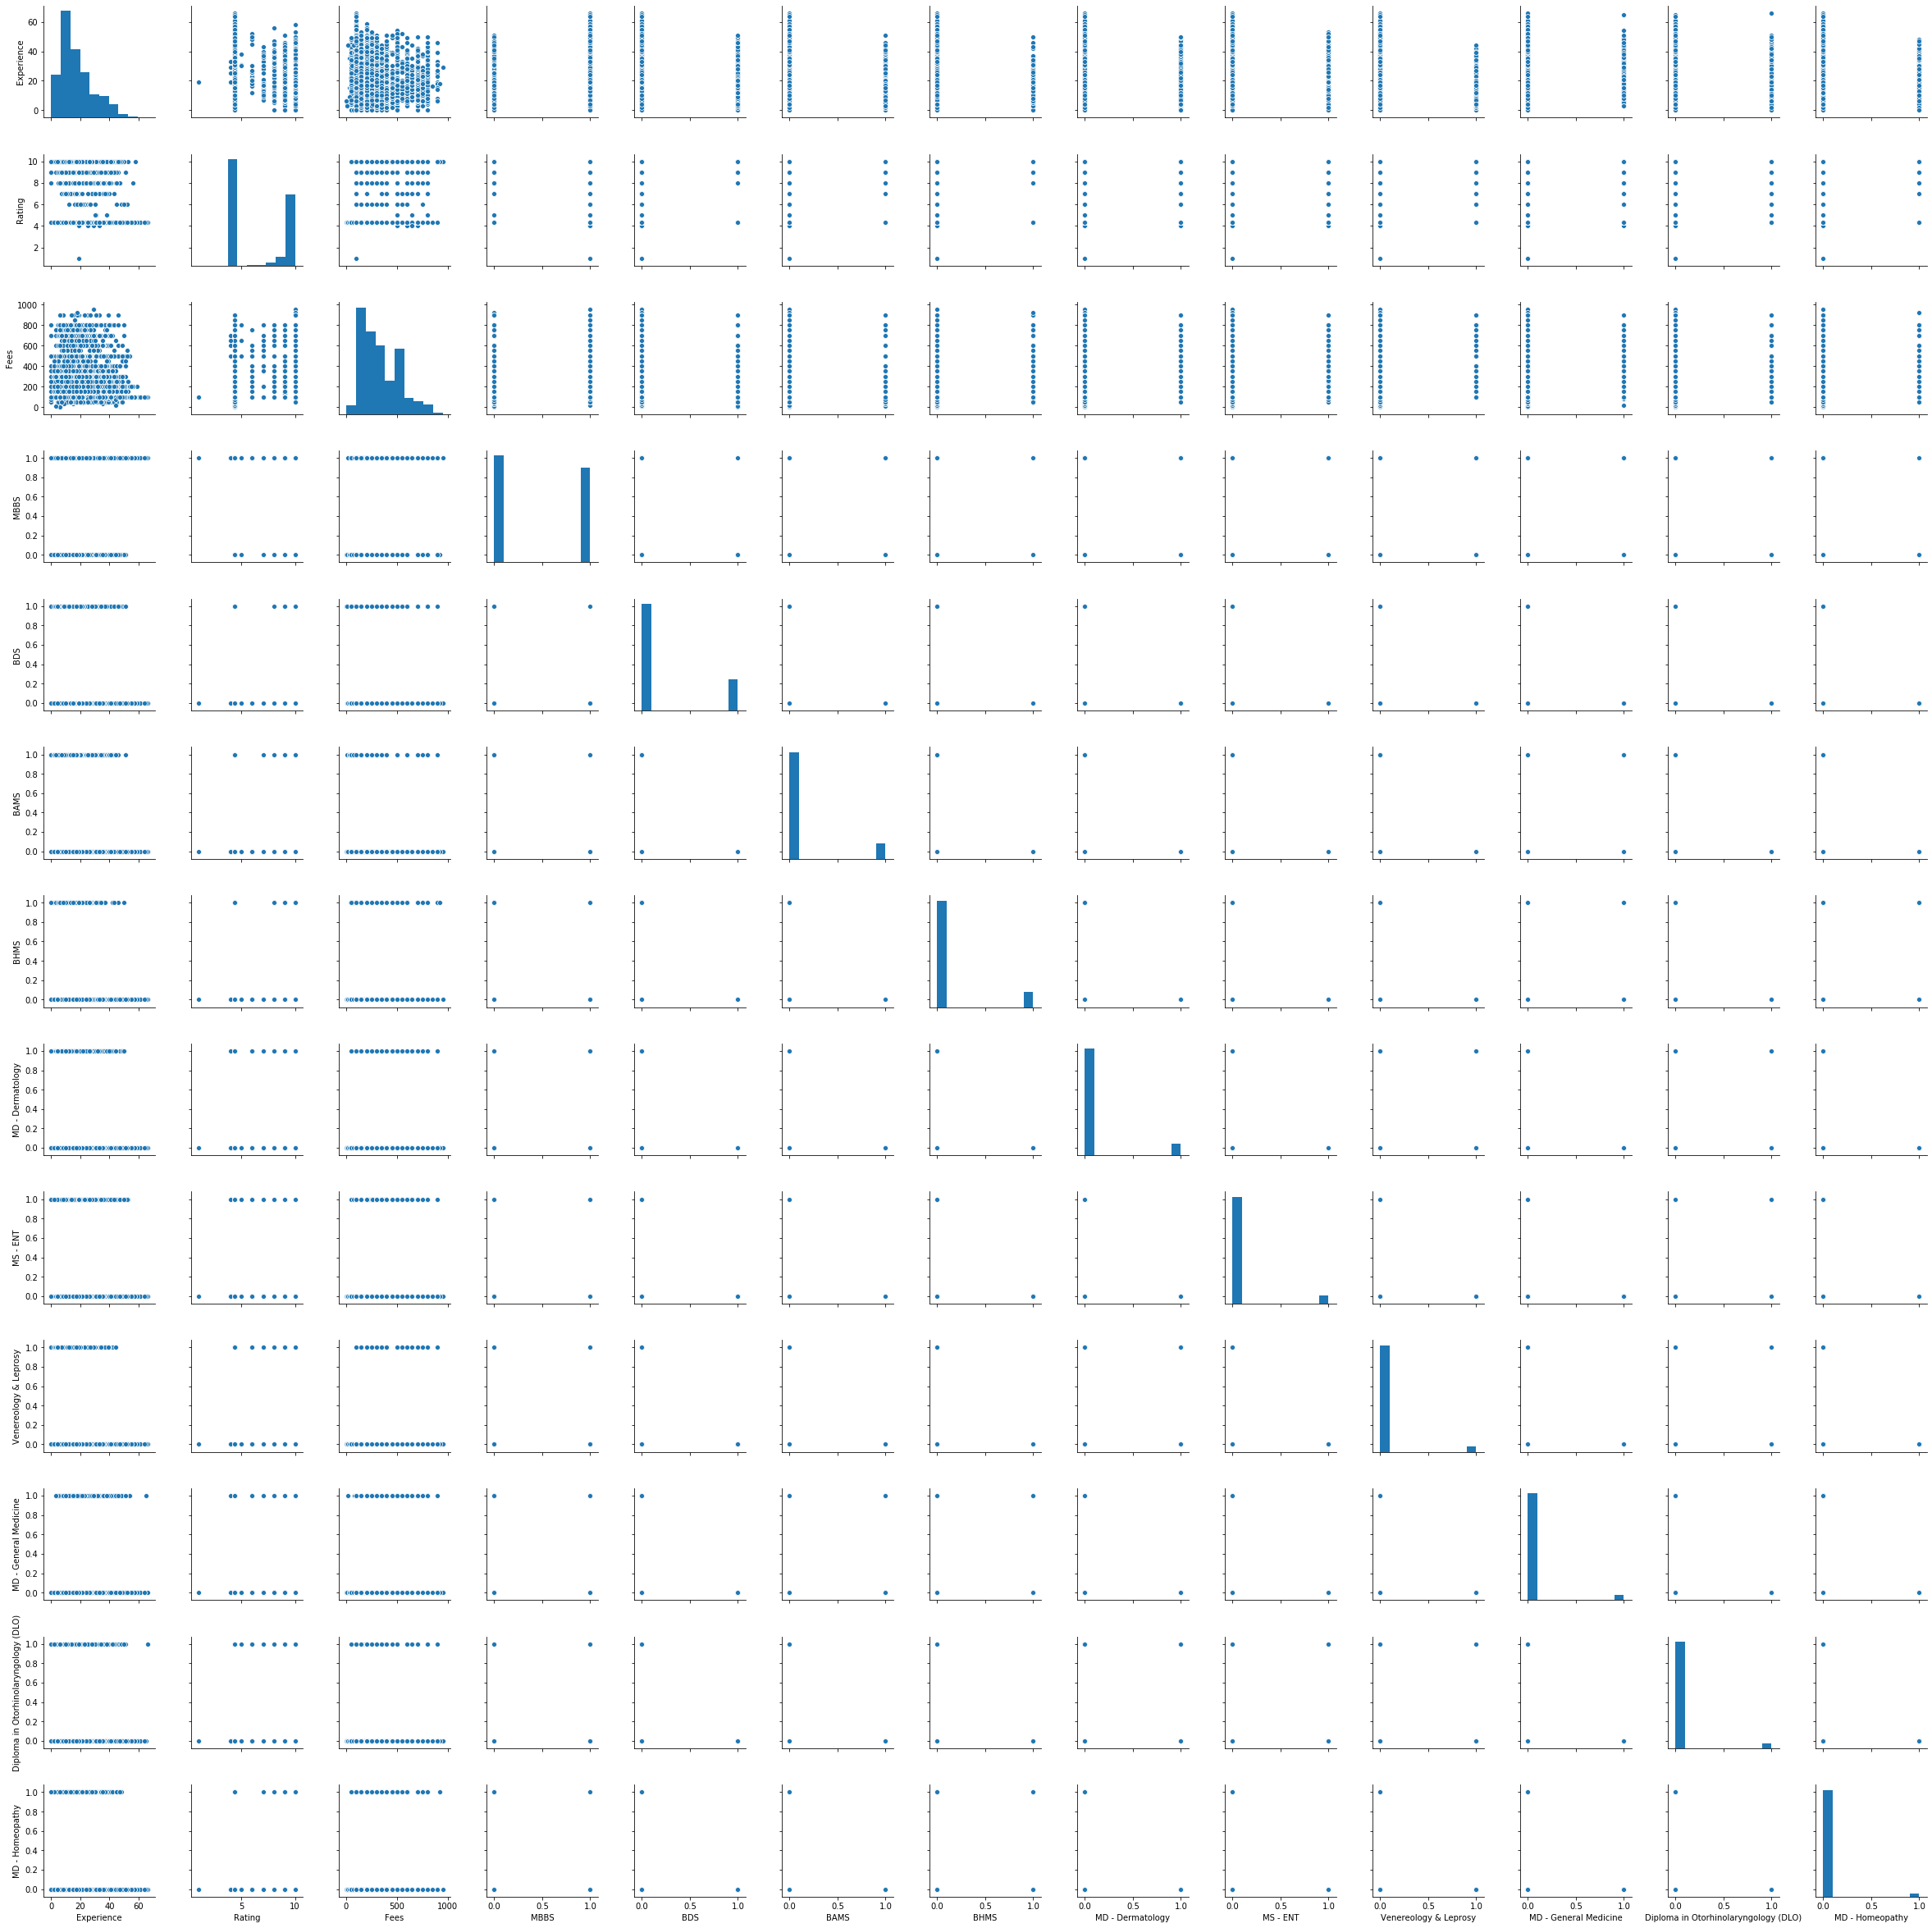

In [42]:
#lets start with data visualization
sns.pairplot(data)

In [43]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Experience                            5961 non-null   int64  
 1   Rating                                5961 non-null   float64
 2   Profile                               5961 non-null   object 
 3   Fees                                  5961 non-null   int64  
 4   Locality                              5961 non-null   object 
 5   City                                  5961 non-null   object 
 6   MBBS                                  5961 non-null   int64  
 7   BDS                                   5961 non-null   int64  
 8   BAMS                                  5961 non-null   int64  
 9   BHMS                                  5961 non-null   int64  
 10  MD - Dermatology                      5961 non-null   int64  
 11  MS - ENT         

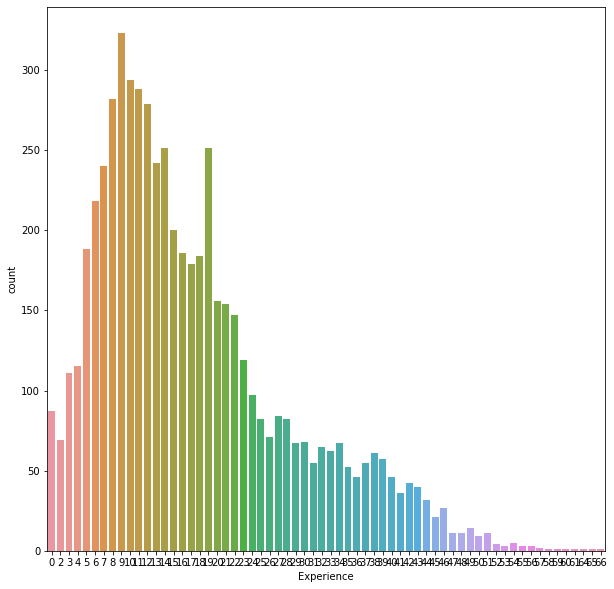

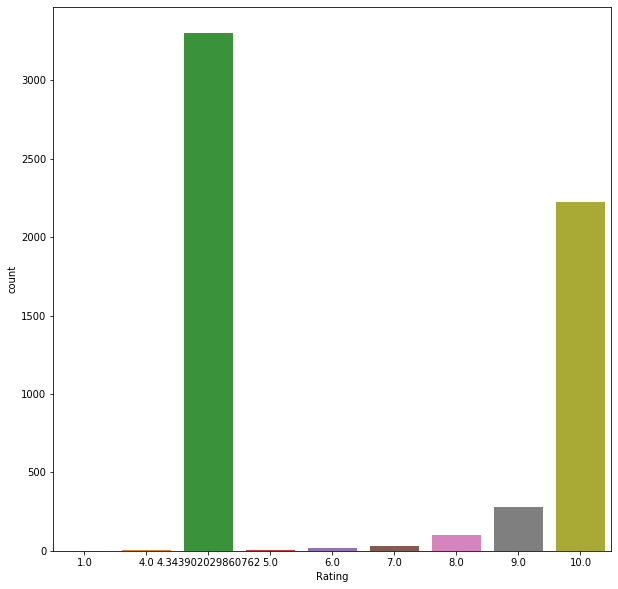

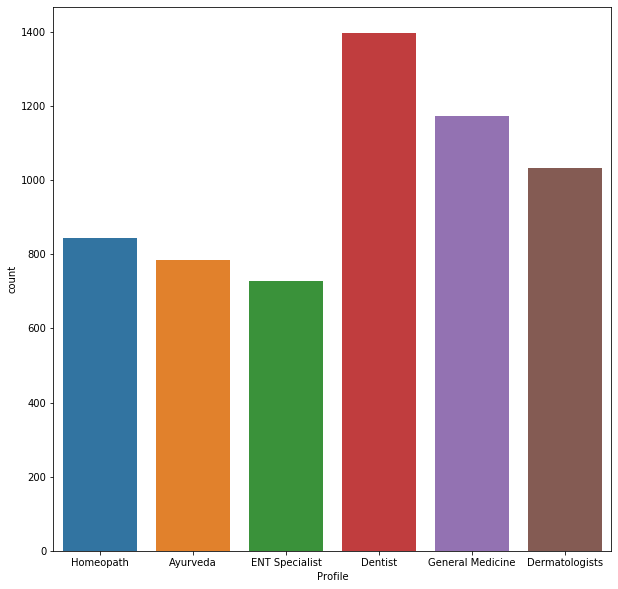

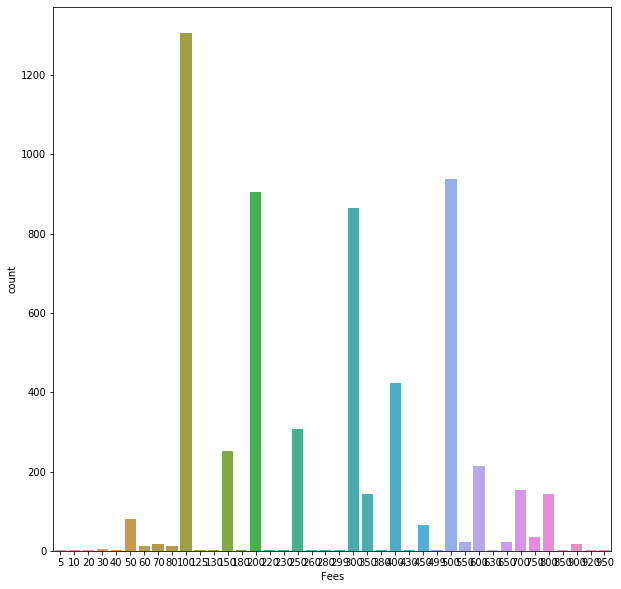

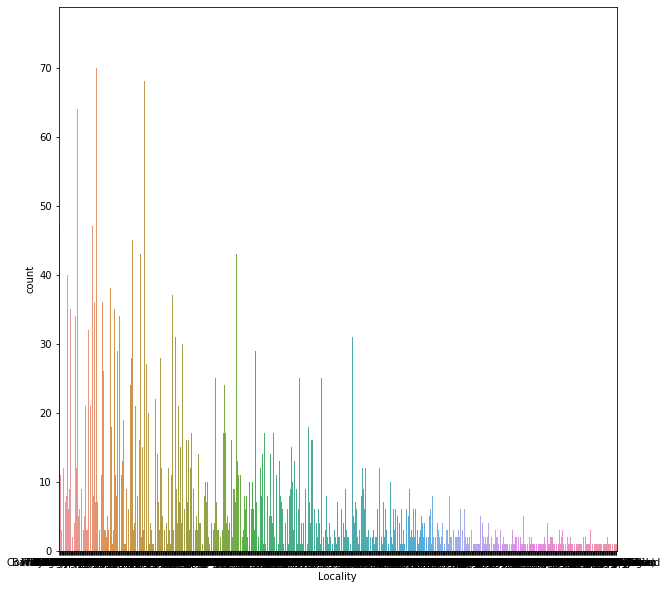

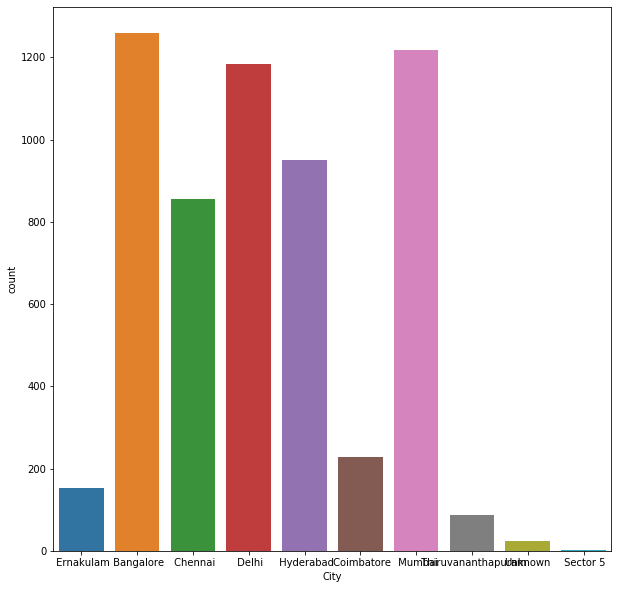

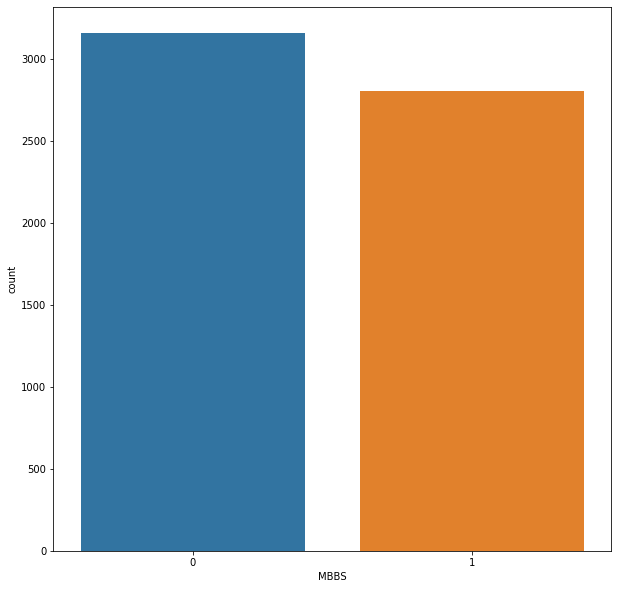

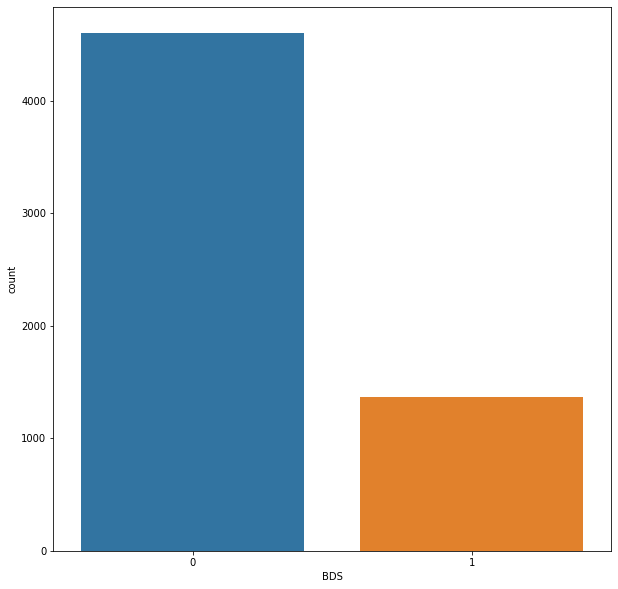

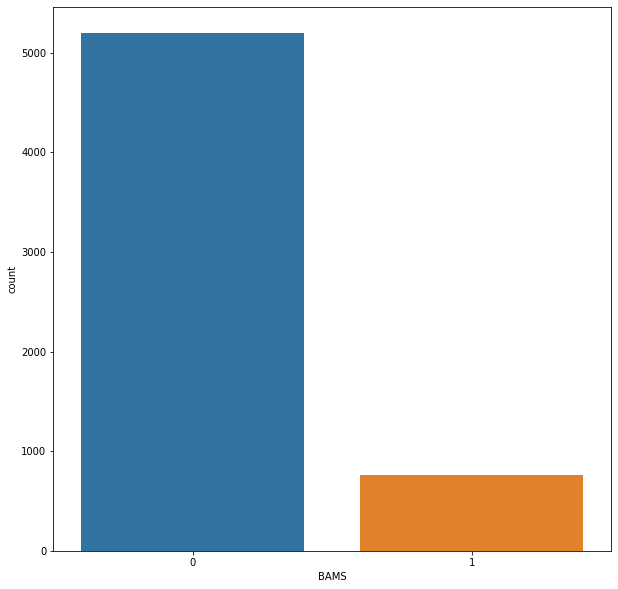

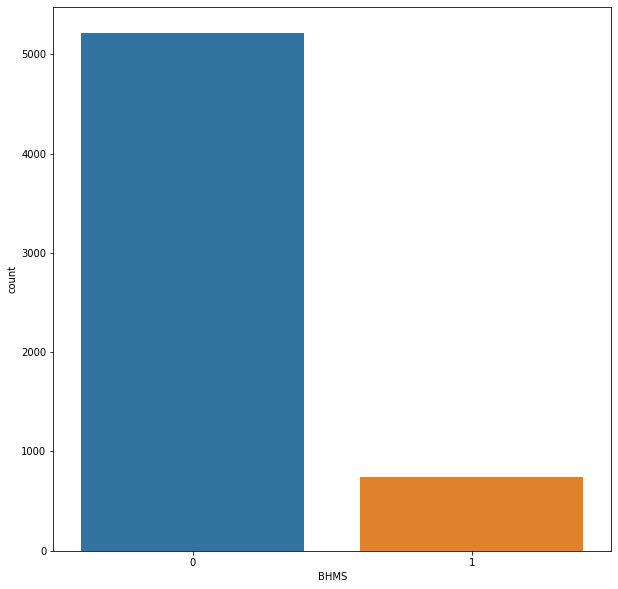

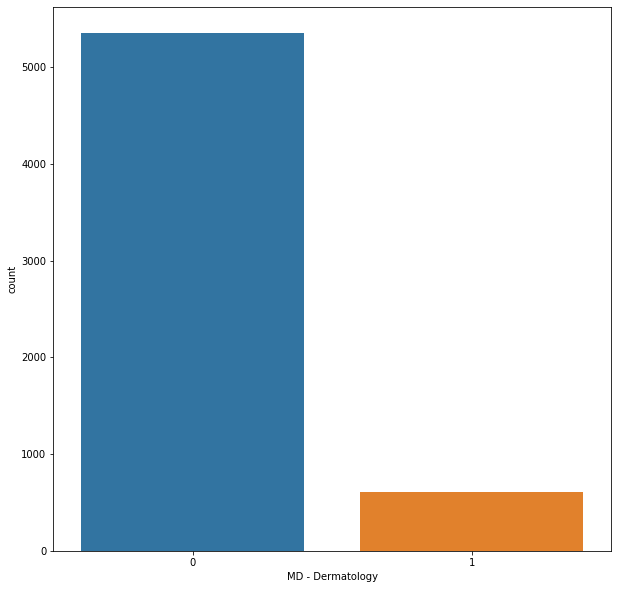

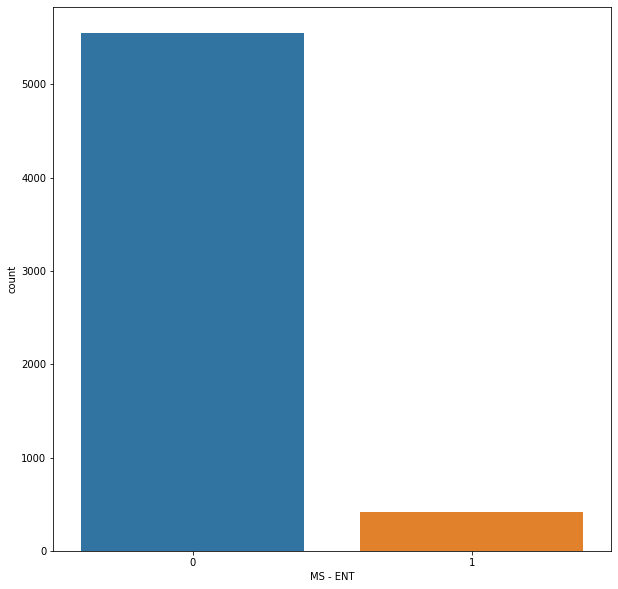

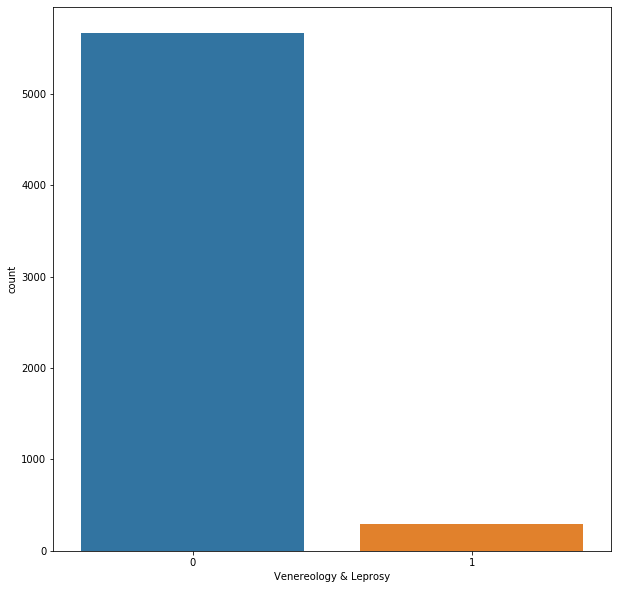

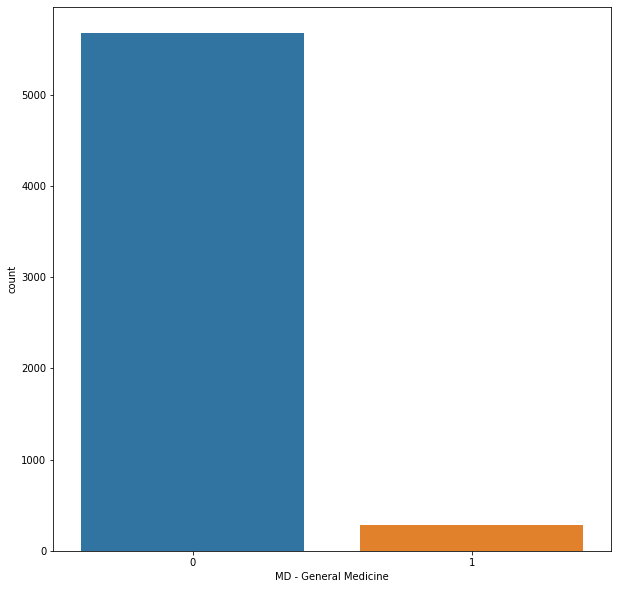

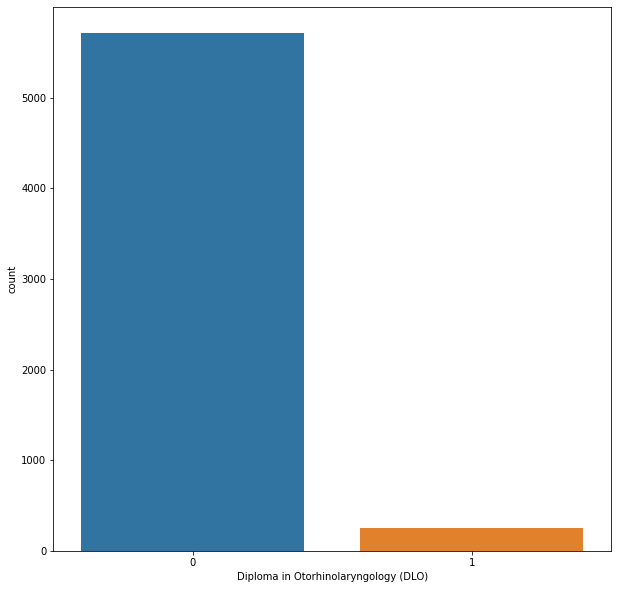

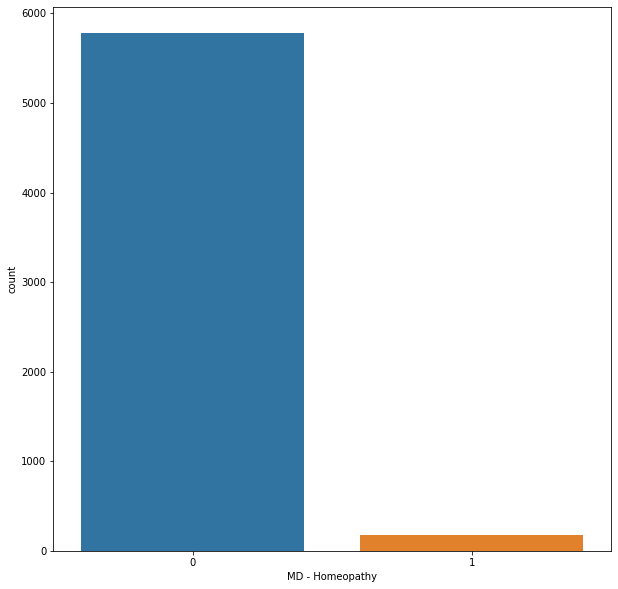

In [44]:
for i in data:
    plt.figure(figsize=(10,10))
    sns.countplot(data[i])
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc38753b2d0>,
      dtype=object)

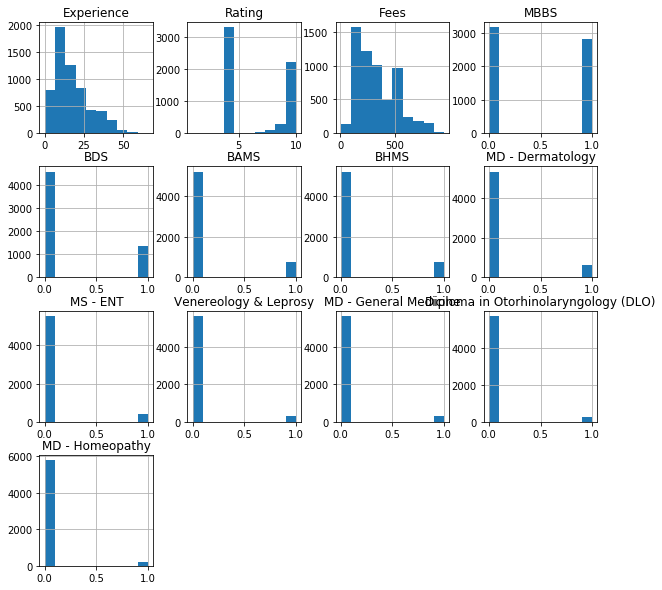

In [45]:
#plotting the hist bar of dataset
data.hist(figsize=(10,10), sharex=False)

# outliers

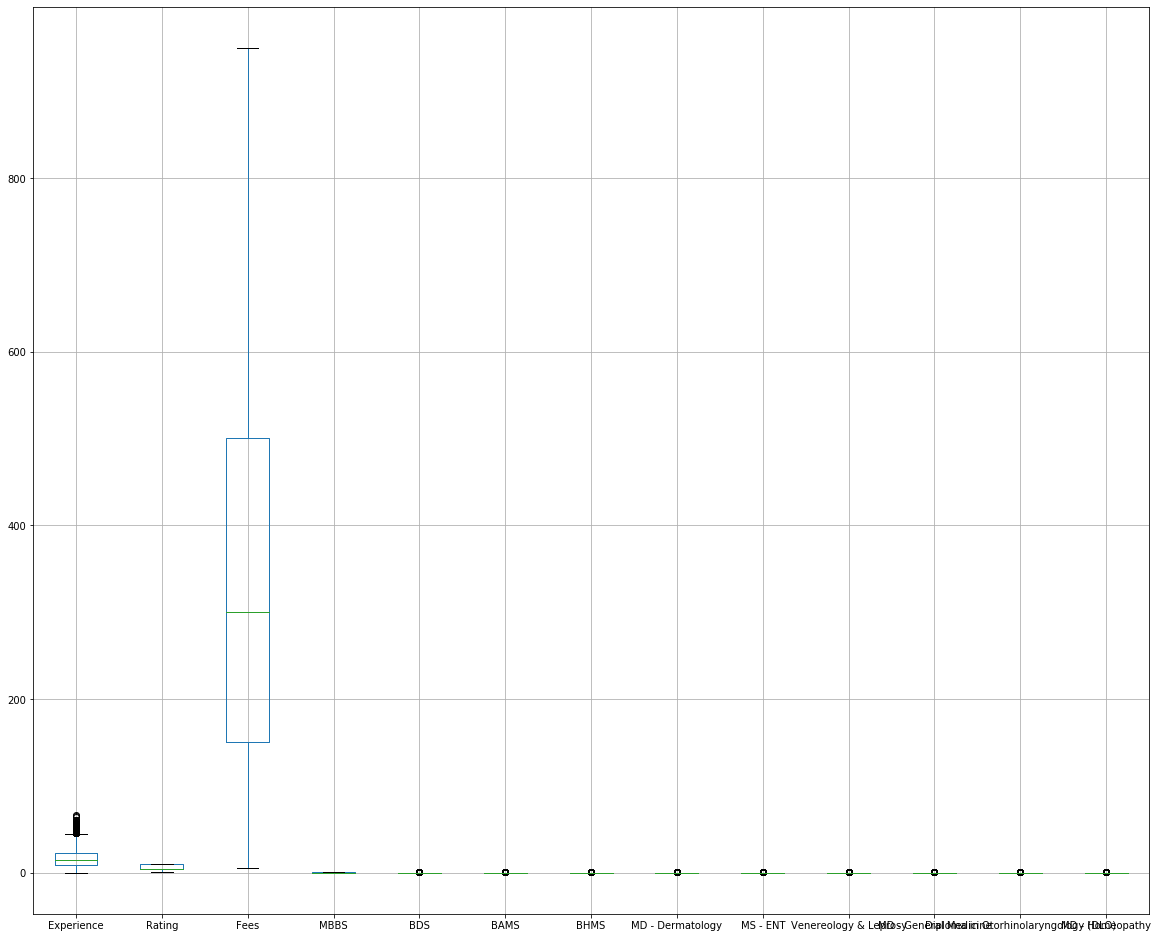

In [46]:
data.boxplot(figsize=[20,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [47]:
#we can keep thse outliers as they have no effect

# Correlation

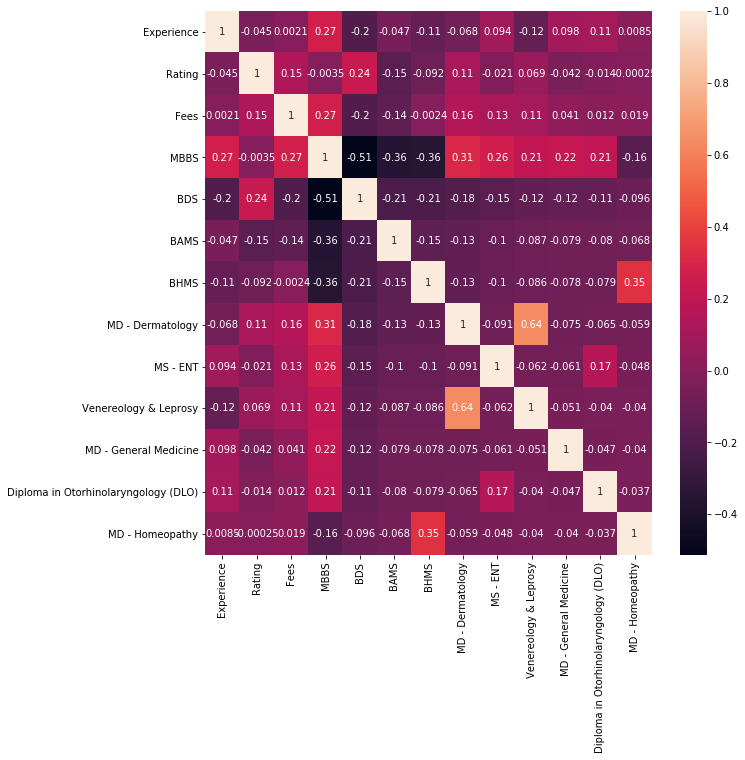

In [48]:
#checking the skewnwss using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)

In [49]:
#there is no high correlation columns so we can proceed further

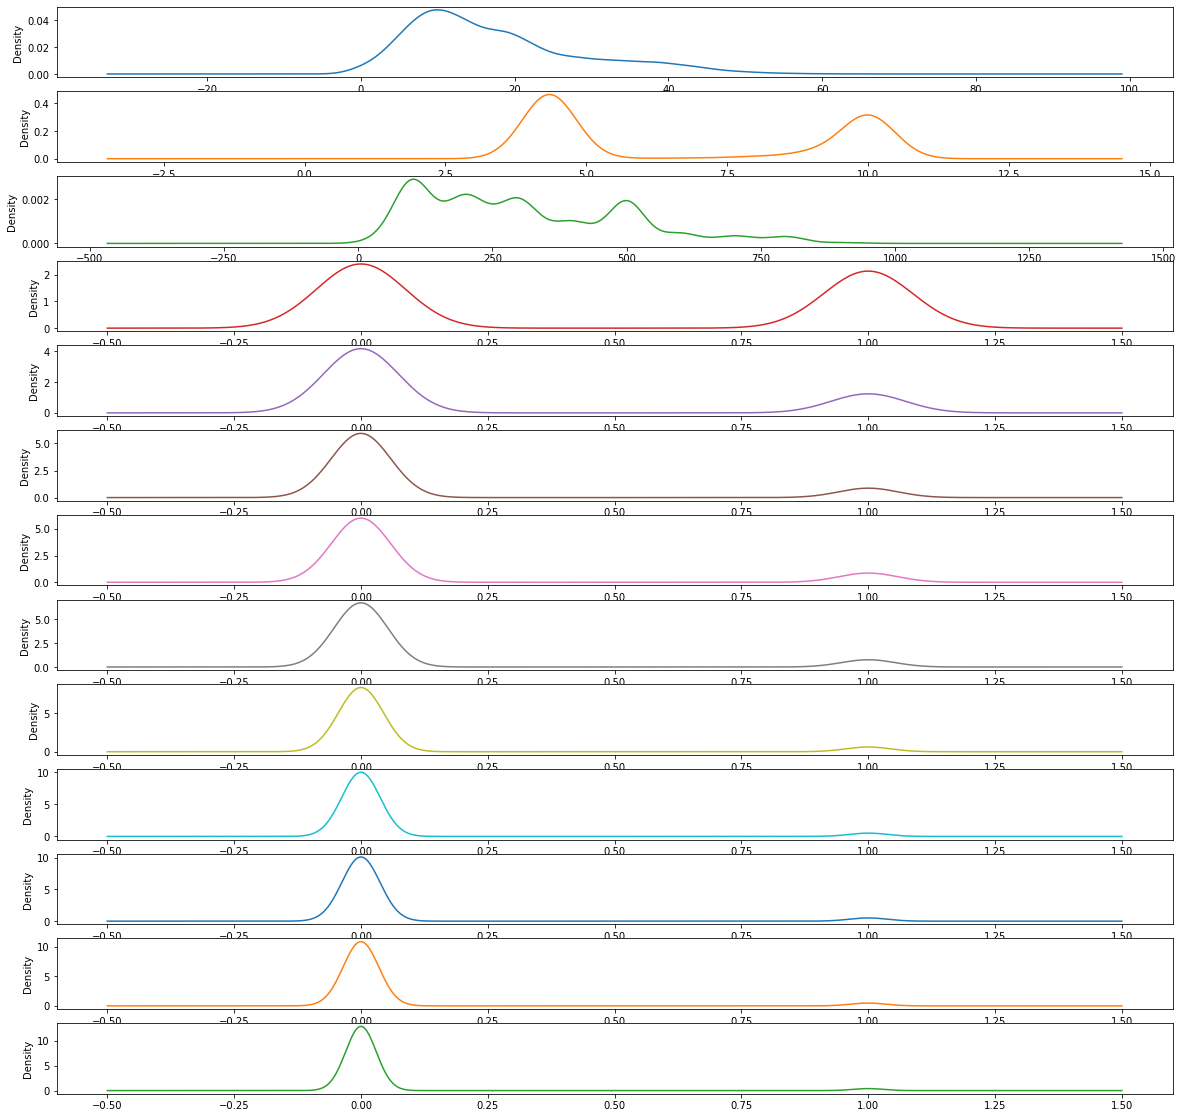

In [50]:
#Plotting the density function
data.plot(kind = 'density', subplots = True,sharex = False, legend = False, figsize = (20,20))
plt.show()

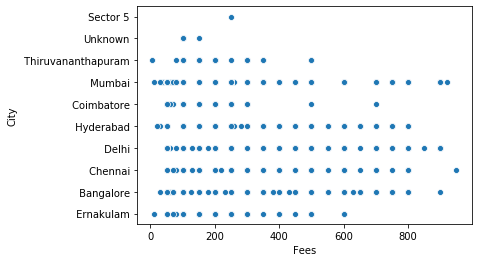

In [51]:
sns.scatterplot(x = 'Fees', y = 'City', data = data)

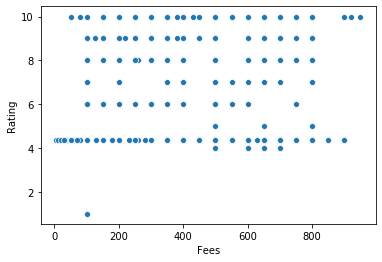

In [52]:
sns.scatterplot(x = 'Fees', y = 'Rating', data = data)

In [53]:
data.describe()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,6.750137,307.944640,0.470559,0.228485,0.127831,0.125482,0.101493,0.068948,0.049153,0.047811,0.041772,0.030364
std,11.142798,2.724546,190.920373,0.499174,0.419892,0.333929,0.331293,0.302006,0.253387,0.216205,0.213384,0.200083,0.171601
min,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,4.343902,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,4.343902,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,10.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,66.000000,10.000000,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Scaling

In [54]:
from sklearn.preprocessing import LabelEncoder
#applying label encoding 
data= data.apply(LabelEncoder().fit_transform)
data.head()

,Experience,Rating,Profile,Fees,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,23,8,5,9,296,4,0,0,0,1,0,0,0,0,0,1
1,11,8,0,22,856,0,0,0,1,0,0,0,0,0,0,0
2,8,2,3,21,452,0,1,0,0,0,0,0,0,0,0,0
3,11,2,0,17,68,0,0,0,1,0,0,0,0,0,0,0
4,19,8,0,17,335,1,0,0,1,0,0,0,0,0,0,0


In [55]:
#dividing dependent and independent variables
x = data.drop(['Fees'],axis = 1)
y = data['Fees']
print(x.shape,y.shape)

(5961, 15) (5961,)


In [56]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Experience                            5961 non-null   int64
 1   Rating                                5961 non-null   int64
 2   Profile                               5961 non-null   int64
 3   Locality                              5961 non-null   int64
 4   City                                  5961 non-null   int64
 5   MBBS                                  5961 non-null   int64
 6   BDS                                   5961 non-null   int64
 7   BAMS                                  5961 non-null   int64
 8   BHMS                                  5961 non-null   int64
 9   MD - Dermatology                      5961 non-null   int64
 10  MS - ENT                              5961 non-null   int64
 11  Venereology & Leprosy                 5961 

In [57]:
x.columns

Index(['Experience', 'Rating', 'Profile', 'Locality', 'City', 'MBBS', 'BDS',
       'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy'],
      dtype='object')

In [58]:
y

0        9
1       22
2       21
3       17
4       17
        ..
5956    21
5957     9
5958    30
5959     9
5960    14
Name: Fees, Length: 5961, dtype: int64

In [59]:
test_data = test_data.apply(LabelEncoder().fit_transform)
test_data.head(2)

,Experience,Rating,Profile,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,34,0,4,142,6,1,0,0,0,0,0,0,0,0,0
1,30,0,3,578,5,1,0,0,0,0,0,0,0,1,0


In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Experience                            1987 non-null   int64
 1   Rating                                1987 non-null   int64
 2   Profile                               1987 non-null   int64
 3   Locality                              1987 non-null   int64
 4   City                                  1987 non-null   int64
 5   MBBS                                  1987 non-null   int64
 6   BDS                                   1987 non-null   int64
 7   BAMS                                  1987 non-null   int64
 8   BHMS                                  1987 non-null   int64
 9   MD - Dermatology                      1987 non-null   int64
 10  MS - ENT                              1987 non-null   int64
 11  Venereology & Leprosy                 1987 

In [61]:
x

,Experience,Rating,Profile,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,23,8,5,296,4,0,0,0,1,0,0,0,0,0,1
1,11,8,0,856,0,0,0,1,0,0,0,0,0,0,0
2,8,2,3,452,0,1,0,0,0,0,0,0,0,0,0
3,11,2,0,68,0,0,0,1,0,0,0,0,0,0,0
4,19,8,0,335,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,18,8,3,70,0,1,0,0,0,0,1,0,0,0,0
5957,32,2,4,535,1,1,0,0,0,0,0,0,0,0,0
5958,40,8,4,215,3,1,0,0,0,0,0,0,0,0,0
5959,14,7,4,841,6,1,0,0,0,0,0,0,1,0,0


In [62]:
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
mine = pd.DataFrame(scalar.fit_transform(x), columns=x.columns)
x = mine

#applying same on test data
test = pd.DataFrame(scalar.fit_transform(test_data), columns=test_data.columns)
test_data = test

In [63]:
from sklearn.preprocessing import power_transform
power = pd.DataFrame(power_transform(x, method = "yeo-johnson"), columns=x.columns)
x = power

#applying same on test data
power1 = pd.DataFrame(power_transform(test_data, method = 'yeo-johnson'), columns=test_data.columns)
test_data = power1

In [64]:
from sklearn.preprocessing import OrdinalEncoder
scale = OrdinalEncoder()
new = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x = new

#applying same ontest data
tester = pd.DataFrame(scale.fit_transform(test_data), columns=test_data.columns)
test_data = tester


In [66]:
test_data

,Experience,Rating,Profile,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,34.0,0.0,4.0,142.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.0,0.0,3.0,578.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,39.0,2.0,2.0,212.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,373.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.0,5.0,1.0,231.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,9.0,0.0,0.0,58.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983,3.0,0.0,2.0,96.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1984,8.0,0.0,4.0,423.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985,11.0,5.0,1.0,26.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Creation

In [67]:
#import the necessary libraries
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from math import sqrt

In [68]:
#Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33, random_state = 100)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(3993, 15) (3993,) (1968, 15) (1968,)


In [69]:
#now checking the cross_val_score of models to get the best model 
models = []
models.append(('LR', LinearRegression()))
models.append(('L', Lasso()))
models.append(('R', Ridge()))
models.append(('DEC', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVC', SVR()))
models.append(('RAN', RandomForestRegressor()))
models.append(('ADA', AdaBoostRegressor()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=100)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='r2')
    
    results.append(cv_results)
    names.append(name)
    
    msg = '%s: %f, %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.133760, 0.020792
L: 0.048614, 0.010216
R: 0.133784, 0.020734
DEC: -0.425080, 0.076990
KNN: -0.018888, 0.040270
SVC: -0.031000, 0.038816
RAN: 0.181428, 0.042252
ADA: 0.140483, 0.011945


In [70]:
#Loading the instances models
lr = LinearRegression()
l = Lasso()
r = Ridge()
dec = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svc = SVR()
ran = RandomForestRegressor()
ada = AdaBoostRegressor()


In [71]:
#creating a list of models
model = []
model.append(('LinearRegression', LinearRegression()))
model.append(('Lasso', Lasso()))
model.append(('ridge', Ridge()))
model.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
model.append(('KNeighborsRegressor', KNeighborsRegressor()))
model.append(('SVR', SVR()))
model.append(('RandomForestRegressor', RandomForestRegressor()))
model.append(('AdaBoostRegressor', AdaBoostRegressor()))


score of  LinearRegression is: 14.7751954459998
r2 score is : 0.11833534217998143
MSE : 59.045282168177025
MAE : 6.525652550912406
RMSE: 7.684092800596374




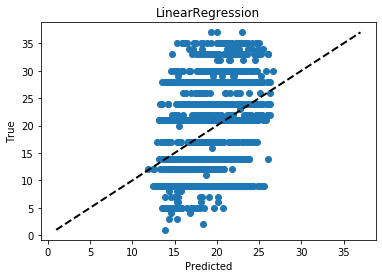

score of  Lasso is: 5.379388128767692
r2 score is : 0.04872097756635585
MSE : 63.70737196060803
MAE : 6.986632204606873
RMSE: 7.981689793559258




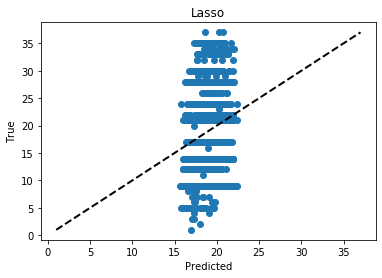

score of  ridge is: 14.774811778220531
r2 score is : 0.11853881093435537
MSE : 59.03165581953318
MAE : 6.52569669018294
RMSE: 7.683206089877661




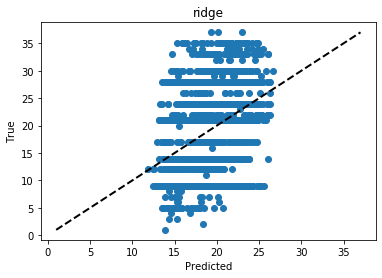

score of  DecisionTreeRegressor is: 98.72536457295642
r2 score is : -0.4140395850221217
MSE : 94.6985518292683
MAE : 7.040396341463414
RMSE: 9.731318093108882




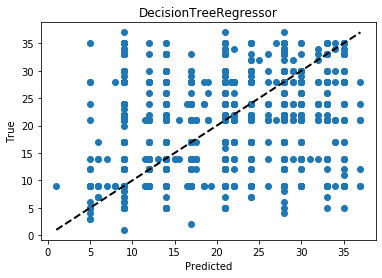

score of  KNeighborsRegressor is: 30.928664967987796
r2 score is : -0.015370207575916783
MSE : 67.99957317073171
MAE : 6.7681910569105685
RMSE: 8.246185370868867




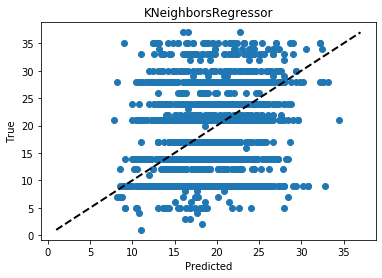

score of  SVR is: -1.496850755118384
r2 score is : -0.018221341551736048
MSE : 68.19051425996372
MAE : 7.10311745674116
RMSE: 8.25775479534018




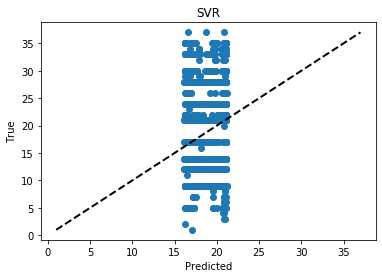

score of  RandomForestRegressor is: 87.59120695559274
r2 score is : 0.15227612324475037
MSE : 56.77226035971218
MAE : 5.974640052162156
RMSE: 7.534736913768932




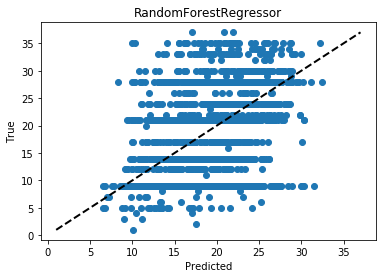

score of  AdaBoostRegressor is: 15.948561331427747
r2 score is : 0.1319414849915609
MSE : 58.13407569709466
MAE : 6.556658551546295
RMSE: 7.624570525419426




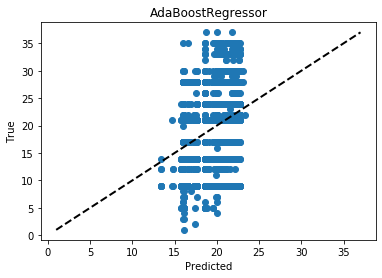

In [72]:
#creating a loop for predicting the data
for n, m in model:
    m.fit(x_train,y_train)
    print("score of ",n,"is:", m.score(x_train,y_train)*100)
    predm = m.predict(x_test)
    #metrics for evaluating regression
    print("r2 score is :", r2_score(y_test, predm))
    print("MSE :",mean_squared_error(y_test, predm))
    print("MAE :",mean_absolute_error(y_test, predm))
    print("RMSE:", sqrt(mean_squared_error(y_test, predm)))
    print("\n")
    #plotting regression plot
    plt.scatter(predm, y_test)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.title(n)
    plt.show()

# Hyper parameter tuning

In [73]:
#setting parameter list for hyper parameter tuning
randomforest_params = {
    'n_estimators' : [1, 10, 20, 30, 100],
    'max_depth' : [5, 8, 15, 25, 30],
    'bootstrap' : [True, False]
}

In [74]:
#applying gridsearch CV on the parameter ,model and with the cross validation
Grid1 = GridSearchCV(ran, randomforest_params, cv=5)

#fitiing the model
Grid1.fit(x_train,y_train)

#printing best params
print(Grid1.best_params_)

{'bootstrap': True, 'max_depth': 8, 'n_estimators': 100}


In [75]:
#getting predictions using tuned model
prediction = Grid1.predict(x_test)
print("r2 score is :", r2_score(y_test, predm))
print("MSE :",mean_squared_error(y_test, predm))
print("MAE :",mean_absolute_error(y_test, predm))
print("RMSE:", sqrt(mean_squared_error(y_test, predm)))




r2 score is : 0.1319414849915609
MSE : 58.13407569709466
MAE : 6.556658551546295
RMSE: 7.624570525419426


# saving our model

In [76]:
import joblib
joblib.dump(ran, "modelran.obj")

['modelran.obj']

In [77]:
model1 = joblib.load("modelran.obj")

# Conclusion

In [78]:
ran.fit(x,y)
predictions = pd.DataFrame(ran.predict(test_data), index=range(len(test_data)), columns=["Predictions"])
predictions

,Predictions
0,18.615000
1,20.920000
2,16.310000
3,17.310000
4,12.302083
...,...
1982,13.610000
1983,25.750000
1984,14.298000
1985,14.720000


In [79]:
submission = pd.concat([test_data, predictions], axis = 1)
submission

,Experience,Rating,Profile,Locality,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,Predictions
0,34.0,0.0,4.0,142.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.615000
1,30.0,0.0,3.0,578.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.920000
2,39.0,2.0,2.0,212.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.310000
3,0.0,0.0,0.0,373.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.310000
4,15.0,5.0,1.0,231.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.302083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,9.0,0.0,0.0,58.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.610000
1983,3.0,0.0,2.0,96.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,25.750000
1984,8.0,0.0,4.0,423.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.298000
1985,11.0,5.0,1.0,26.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.720000


In [80]:
submission.to_excel('Sample_submission.xlsx')